In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import re
import Functions

In [39]:
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, roc_auc_score,make_scorer
from scipy.stats import ks_2samp

In [40]:
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [41]:
import warnings

In [42]:
df = pd.read_csv("/Users/user/Documents/Spam_Detection/Data/data_clear.csv") 

In [43]:
df=df.drop(columns='index',axis=1)

In [44]:
X = df['Message']
Y = df['Category']

In [45]:
X.shape

(5157,)

In [46]:
Y.shape

(5157,)

In [47]:
X=np.array(Functions.change_format(X))

In [48]:
from sklearn.feature_extraction.text import CountVectorizer

tfidf = CountVectorizer()
X = tfidf.fit_transform(X)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [50]:
models = {
    "Logistic Regression":LogisticRegression(),
    "Naive Bayes":MultinomialNB(),
    "Random Forest":RandomForestClassifier(),
    "KNN":KNeighborsClassifier(),
    "XgBoostclassifier":xgb.XGBClassifier()}

In [51]:
Functions.train_model(models,X_train,y_train,X_test,y_test)

Model: Logistic Regression
, Accuracy_Score: 0.9738372093023255
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       897
           1       0.97      0.83      0.89       135

    accuracy                           0.97      1032
   macro avg       0.97      0.91      0.94      1032
weighted avg       0.97      0.97      0.97      1032

Confusion Matrix: 
 [[893   4]
 [ 23 112]]
Model: Naive Bayes
, Accuracy_Score: 0.9641472868217055
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       897
           1       0.81      0.95      0.87       135

    accuracy                           0.96      1032
   macro avg       0.90      0.96      0.93      1032
weighted avg       0.97      0.96      0.97      1032

Confusion Matrix: 
 [[867  30]
 [  7 128]]
Model: Random Forest
, Accuracy_Score: 0.9786821705426356
              precision    recall  f1-score   support

           0       0.98    

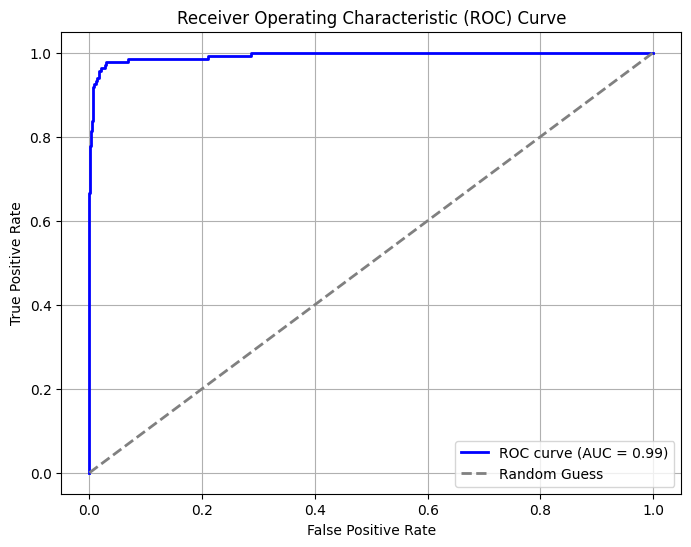

ROC-AUC Score for Logistic Regression: 0.9940


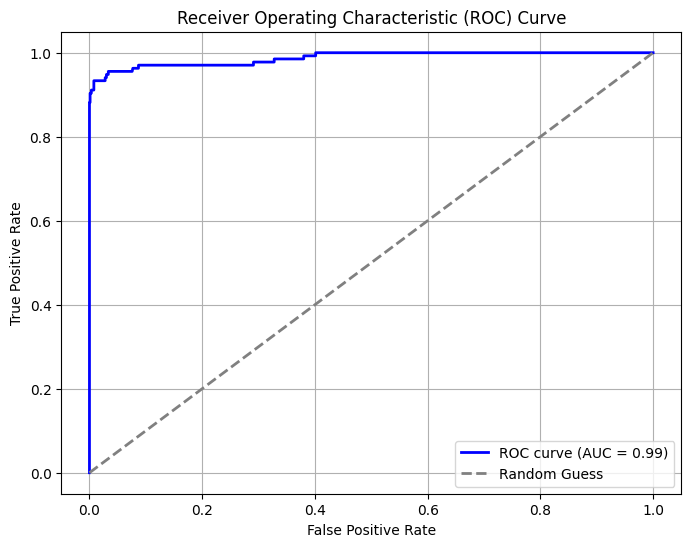

ROC-AUC Score for Naive Bayes: 0.9875


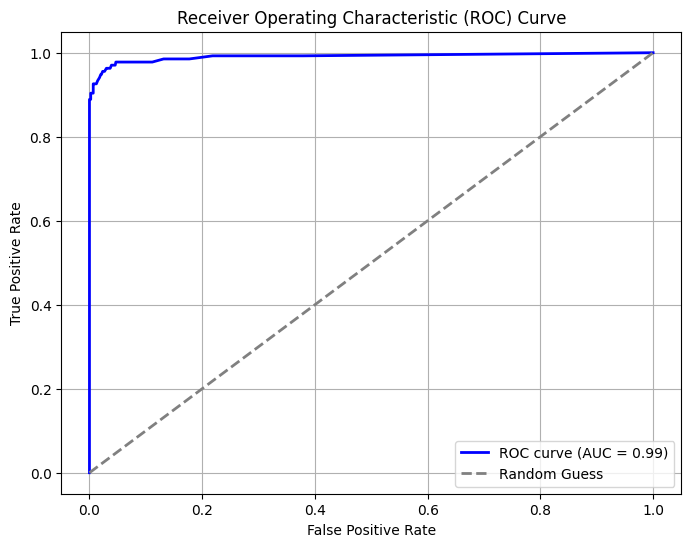

ROC-AUC Score for Random Forest: 0.9910


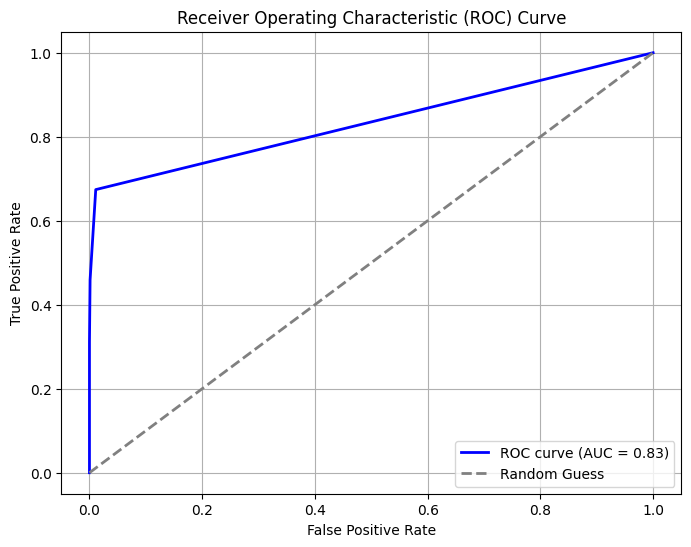

ROC-AUC Score for KNN: 0.8338


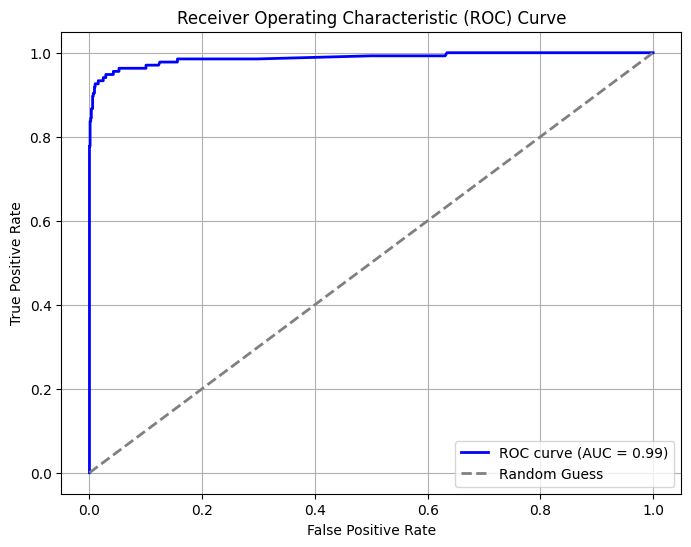

ROC-AUC Score for XgBoostclassifier: 0.9878


In [52]:
Functions.roc_plot(models,X_test, y_test)

### GridSearch

In [53]:
scoring = { 'accuracy': make_scorer(accuracy_score), 'recall': make_scorer(recall_score) }

In [54]:
xgb_gridsearch_grid = { "n_estimators": [100, 500, 1000],
                    "learning_rate": [0.1, 0.05, 0.01],
                    "max_depth": [2, 8, 16, 64, 128], 
                    "colsample_bytree": [0.3, 0.8, 1],
                    "gamma": [0,1,5],
                    'reg_alpha': [ 0.01, 0.1, 1],          
                    'reg_lambda': [0.1, 1] } 

knn_gridsearch_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

lr_gridsearch_grid = {
    'penalty': ['l1', 'l2'],
    'C': [100, 50, 10, 1, 0.1, 0.01, 0.001],
    'max_iter': [100,250, 500, 750, 1000, 2500, 5000],
    'solver': ['liblinear', 'saga']
    
    }

rf_gridsearch_grid = {
    'n_estimators': [10, 50, 100, 200, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [2, 8, 16, 32, 64, 128],
    'min_samples_split': [2, 4, 8, 16, 24],
    'min_samples_leaf': [1, 2, 5, 10, 15, 30],
}

NB_gridsearch_grid = {
    'alpha': [0.001, 0.01, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0],  
    'fit_prior': [True, False],  
    'force_alpha': [True, False]  
}




In [55]:
'''models = {
    "Logistic Regression":GridSearchCV(
                        estimator=LogisticRegression(), 
                        param_grid=lr_gridsearch_grid,
                        cv=5, 
                        scoring= scoring,  
                        refit="accuracy",  
                        verbose=0, 
                        n_jobs=-1,
                         ),

    "Naive Bayes":GridSearchCV(
                  estimator=MultinomialNB(),
                  param_grid=NB_gridsearch_grid, 
                  cv=5, 
                  scoring=scoring, 
                  refit='accuracy',
                  verbose=0, 
                  n_jobs=-1),

    "Random Forest":GridSearchCV(
                     estimator=RandomForestClassifier(), 
                     param_grid=rf_gridsearch_grid,
                     cv=5,
                     scoring=scoring,
                     refit='accuracy',
                     verbose=0,
                     n_jobs=-1,
                     ),

    "KNN":GridSearchCV(
            estimator=KNeighborsClassifier(),   
            param_grid=knn_gridsearch_grid, 
            cv=5,  
            scoring=scoring, 
            refit='accuracy', 
            verbose=0,
            n_jobs=-1,  
            ),

    "XgBoostclassifier": GridSearchCV(
                        estimator=xgb.XGBClassifier(), 
                        param_grid=xgb_gridsearch_grid,
                        cv=5,
                        scoring=scoring,
                        refit='accuracy',
                        verbose=0,
                        n_jobs=-1,
                        )}'''

'models = {\n    "Logistic Regression":GridSearchCV(\n                        estimator=LogisticRegression(), \n                        param_grid=lr_gridsearch_grid,\n                        cv=5, \n                        scoring= scoring,  \n                        refit="accuracy",  \n                        verbose=0, \n                        n_jobs=-1,\n                         ),\n\n    "Naive Bayes":GridSearchCV(\n                  estimator=MultinomialNB(),\n                  param_grid=NB_gridsearch_grid, \n                  cv=5, \n                  scoring=scoring, \n                  refit=\'accuracy\',\n                  verbose=0, \n                  n_jobs=-1),\n\n    "Random Forest":GridSearchCV(\n                     estimator=RandomForestClassifier(), \n                     param_grid=rf_gridsearch_grid,\n                     cv=5,\n                     scoring=scoring,\n                     refit=\'accuracy\',\n                     verbose=0,\n                     

In [56]:
#Functions.train_model(models,X_train,y_train,X_test,y_test)

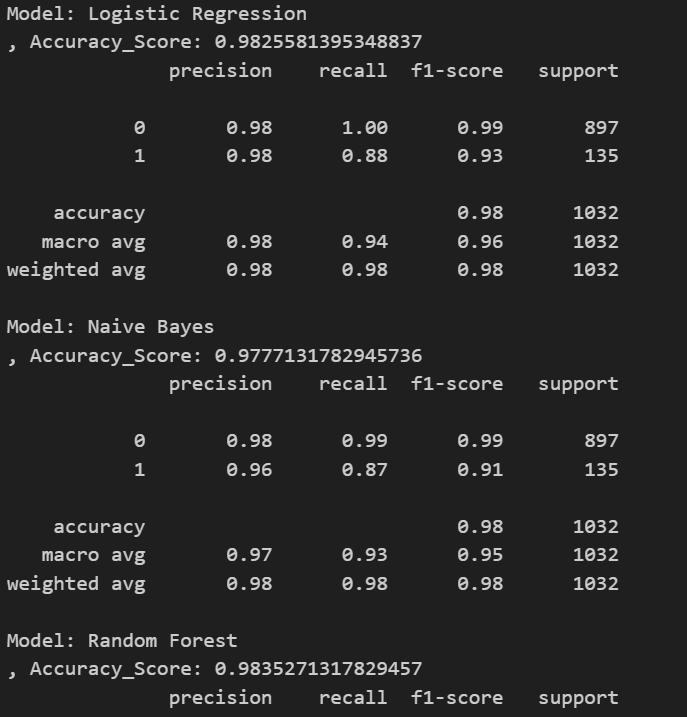

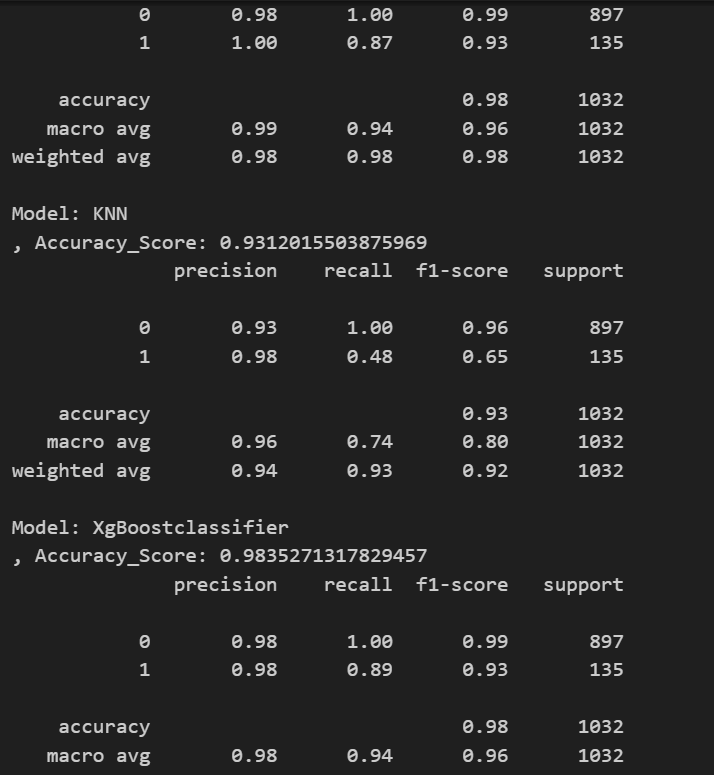

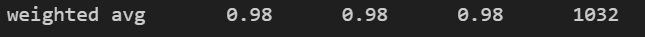